# LSTM

In [ ]:
import numpy as np
import pandas as pd

import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('C:\\Users\\Naravith\\Desktop\\ปี4\\Project - github\\Project\\RYU\\link4.csv')
df

In [ ]:
# Because we will predict BW Util

df1 = df.reset_index()['BW_Utilization']

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# Scaling data

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

df1

### Train - Test Split 

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size


train_data, test_data = df1[0:training_size,:] , df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train.shape

### Reshape input to be [samples, timesteps, features] 

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train

### Creating and Training LSTM Model 

In [ ]:
model=Sequential()

model.add(LSTM(120,dropout=0.5,recurrent_dropout=0.5,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(100,dropout=0.5,recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
#Train the model

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

## Predicted Test data and plot the output 

In [15]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [16]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.20279679940172488

In [18]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.19316881487470794

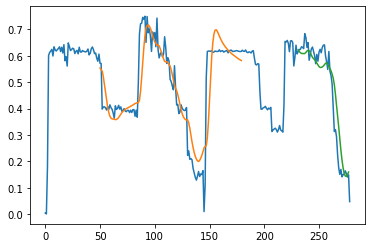

In [19]:
### Plotting 
# shift train predictions for plotting
# look back = timestep

look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#ORANGE = Train predicted Data
#GREEN = Test predicted Data

#  Regression and Decision Tree Regressor

In [23]:
df_reg = pd.read_csv('C:\\Users\\Naravith\\Desktop\\ปี4\\Project - github\\Project\\RYU\\link4.csv')

df_reg = df_reg[['BW_Utilization']]
df_reg

,BW_Utilization
0,0.004477
1,0.001142
2,0.181570
3,0.601182
4,0.612060
...,...
274,0.164200
275,0.153910
276,0.140826
277,0.148933


In [24]:
future_days = 25

In [25]:
df_reg['Prediction'] = df_reg[['BW_Utilization']].shift(-future_days)
df_reg.tail(30)

,BW_Utilization,Prediction
249,0.579305,0.164200
250,0.613214,0.153910
251,0.624327,0.140826
252,0.611047,0.148933
253,0.631496,0.047742
254,0.639740,NaN
255,0.640918,NaN
256,0.598611,NaN
257,0.575805,NaN
258,0.547818,NaN


In [26]:
# Create the feature dataset (X) and convert to numpy array and remove the last 'x' rows days
X = np.array(df_reg.drop(['Prediction'],1))[:-future_days]
X

array([[0.004477  ],
       [0.00114235],
       [0.18157021],
       [0.60118164],
       [0.61205986],
       [0.6183448 ],
       [0.6241301 ],
       [0.59890114],
       [0.63363548],
       [0.62194687],
       [0.61796562],
       [0.62250053],
       [0.62757828],
       [0.63336197],
       [0.61567513],
       [0.63200279],
       [0.61021942],
       [0.64174812],
       [0.58085937],
       [0.59640182],
       [0.56082405],
       [0.64853096],
       [0.6351033 ],
       [0.61953392],
       [0.62341759],
       [0.62826393],
       [0.62592545],
       [0.60809319],
       [0.61666634],
       [0.62016663],
       [0.60701309],
       [0.63200111],
       [0.61420601],
       [0.61367676],
       [0.6196817 ],
       [0.61642204],
       [0.615298  ],
       [0.61428291],
       [0.61763397],
       [0.62536598],
       [0.60308411],
       [0.60884178],
       [0.62622627],
       [0.63294495],
       [0.62277496],
       [0.60787369],
       [0.60995407],
       [0.590

In [27]:
X.shape

(254, 1)

In [29]:
# Create target dataset (y), convert to nparray and get all of target value except the last 'x' rows or days
y = np.array(df_reg['Prediction'])[:-future_days]
y

array([0.62826393, 0.62592545, 0.60809319, 0.61666634, 0.62016663,
       0.60701309, 0.63200111, 0.61420601, 0.61367676, 0.6196817 ,
       0.61642204, 0.615298  , 0.61428291, 0.61763397, 0.62536598,
       0.60308411, 0.60884178, 0.62622627, 0.63294495, 0.62277496,
       0.60787369, 0.60995407, 0.59033897, 0.57905174, 0.60611382,
       0.5713028 , 0.57060684, 0.39800499, 0.40572731, 0.40680382,
       0.40262009, 0.39437675, 0.40724884, 0.39688957, 0.41399376,
       0.40334999, 0.39712677, 0.38263344, 0.36329765, 0.4103598 ,
       0.39644997, 0.40106468, 0.41213531, 0.39776024, 0.40622864,
       0.38903618, 0.3930603 , 0.39971207, 0.39061485, 0.38820221,
       0.39299461, 0.39300179, 0.38464767, 0.39353485, 0.38516586,
       0.39603462, 0.39559723, 0.37077003, 0.39374527, 0.36727165,
       0.50103348, 0.6822847 , 0.72085556, 0.72258835, 0.74525177,
       0.73754524, 0.74933327, 0.65032845, 0.74829193, 0.68664116,
       0.70155777, 0.67409019, 0.61640495, 0.68972282, 0.66525

In [30]:
# Split the data into 75% train and 25% test and create the model
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

#Create a model
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [31]:
y_train.shape

(190,)

In [32]:
# Get the last 'x' rows of feature dataset (Last 25 days)
x_future = df_reg.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)

#convert to np array
x_future = np.array(x_future)
x_future

# X_Future is the input for model prediction

array([[0.63979553],
       [0.60671753],
       [0.61566986],
       [0.62347633],
       [0.62406883],
       [0.63376816],
       [0.63180885],
       [0.62685219],
       [0.68342865],
       [0.66944298],
       [0.63158928],
       [0.64950447],
       [0.58271011],
       [0.60329498],
       [0.62526154],
       [0.63271049],
       [0.61711433],
       [0.59948441],
       [0.56963326],
       [0.60493477],
       [0.57930489],
       [0.61321358],
       [0.62432732],
       [0.61104668],
       [0.6314959 ]])

In [33]:
tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

print(tree_prediction)

[0.63973976 0.64091789 0.62536598 0.57580482 0.54781754 0.61599716
 0.54213394 0.5239743  0.57046738 0.4047316  0.3128688  0.62432732
 0.29375793 0.22412048 0.17583725 0.15070602 0.16961411 0.14155235
 0.14964149 0.1516777  0.16419983 0.15391037 0.63200111 0.14893288
 0.3128688 ]


In [34]:
tree_prediction.shape

(25,)

In [35]:
math.sqrt(mean_squared_error(y_test[-25:],tree_prediction))

0.2642422323682812

In [36]:
math.sqrt(mean_squared_error(y_test[-25:],lr_prediction))

0.16338823098774352